# 1. Instalacion de librerias

In [185]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [176]:
df_comentarios = pd.read_excel("../data/final.xlsx")

In [177]:
df_comentarios['Sentimiento'] = df_comentarios['Sentimiento'].map({'Positivo':1, 'Negativo':0})

In [178]:
df_comentarios

,Texto,Sentimiento
0,Aprendi regresiones,1
1,Mucha tarea,0
2,Aprendi modelos de texto,1
3,Tareas muy largas,0
4,Aprendi a utilizar imágenes,1
5,El profe se demora en entregar las notas,0
6,Me gusto competir por el mejor modelo,1
7,Los examenes son largos,0
8,Aprendi gradientes,1
9,Aprendi NLP,1


In [179]:
df_comentarios['Texto'] = df_comentarios['Texto'].str.lower()

In [180]:
df_comentarios

,Texto,Sentimiento
0,aprendi regresiones,1
1,mucha tarea,0
2,aprendi modelos de texto,1
3,tareas muy largas,0
4,aprendi a utilizar imágenes,1
5,el profe se demora en entregar las notas,0
6,me gusto competir por el mejor modelo,1
7,los examenes son largos,0
8,aprendi gradientes,1
9,aprendi nlp,1


In [181]:
def obtener_palabras_unicas(texto, diccionario):
    palabras = re.findall(r'\b\w+\b', texto)
    for palabra in palabras:
        diccionario[palabra] = diccionario.get(palabra, 0) + 1

palabras_unicas = {}

df_comentarios['Texto'].apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))
palabras = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
valores = pd.DataFrame(palabras_unicas.values(), columns=["Frecuencia"])
df_palabras_unicas = pd.concat([palabras,valores],ignore_index=True, axis=1)

In [182]:
df_palabras_unicas

,0,1
0,aprendi,10
1,regresiones,1
2,mucha,1
3,tarea,1
4,modelos,1
...,...,...
57,grabaciones,1
58,distraigo,1
59,la,1
60,parte,1


In [183]:
df_palabras_unicas.sort_values(by=1, ascending=False, inplace=True)

In [184]:
df_palabras_unicas

,0,1
0,aprendi,10
19,las,5
29,son,4
21,me,4
44,es,3
...,...,...
30,largos,1
1,regresiones,1
32,nlp,1
33,redes,1


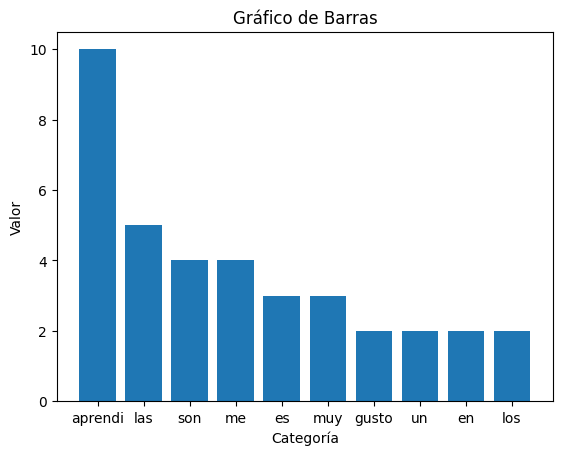

In [186]:
plt.bar(df_palabras_unicas.head(10)[0], df_palabras_unicas.head(10)[1])

plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.title('Gráfico de Barras')

plt.show()

Para calcular la correlacion es necesario cambiar los textos por una representacion numericas

In [189]:
def calculo_corr_target(x=[],y=[]):
    media_x = x.mean()
    media_y = y.mean()
    sumatoria_num = 0
    sum_y=0
    sum_x=0
    for xi,yi in zip(x,y):
        sumatoria_num += (yi-media_y) * (xi-media_x)
        sum_y += (yi-media_y)**2
        sum_x += (xi-media_x)**2
    return sumatoria_num/(sum_y*sum_x)**0.5

In [193]:
positivos = df_comentarios[df_comentarios['Sentimiento'] == 1]
negativo = df_comentarios[df_comentarios['Sentimiento'] == 0]
corr = calculo_corr_target(positivos['Sentimiento'], negativo['Sentimiento'])

C:\Users\David\AppData\Local\Temp\ipykernel_2320\1027774422.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return sumatoria_num/(sum_y*sum_x)**0.5


In [192]:
positivos

,Texto,Sentimiento
0,aprendi regresiones,1
2,aprendi modelos de texto,1
4,aprendi a utilizar imágenes,1
6,me gusto competir por el mejor modelo,1
8,aprendi gradientes,1
9,aprendi nlp,1
10,aprendi redes neuronales,1
13,aprendi python,1
14,aprendi que es pca,1
15,aprendi que es un cluster,1
